In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception # type: ignore
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras import layers, models, losses, optimizers

In [2]:
img = load_img("./data/train/ambarella/ambarella_00003.jpg", target_size=(299,299))

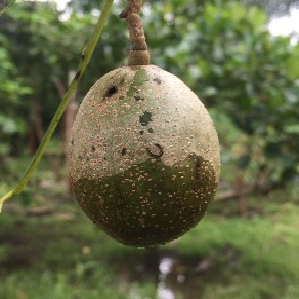

In [3]:
img

In [4]:
np.array(img).shape

(299, 299, 3)

# Train model

In [9]:
def make_model():
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(299, 299, 3)
    )
    
    ########################
    inputs = keras.Input(shape=(299, 299, 3))
    base = base_model(inputs, training = False)
    vectors = layers.GlobalAveragePooling2D()(base)
    inner = layers.Dense(64, activation='relu')(vectors)
    outputs = layers.Dense(5)(inner)
    model = keras.Model(inputs, outputs)
    ########################
    
    # optimizer = optimizers.Adam(learning_rate=learning_rate)
    loss = losses.CategoricalCrossentropy(from_logits=True)

    # model.compile(
    #     optimizer=optimizer,
    #     loss=loss,
    #     metrics=['accuracy']
    # )
    model.compile(loss = loss, metrics=['accuracy'])

    return model



In [10]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory(
    './data/train',
    target_size=(299, 299),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './data/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 513 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [11]:
model = make_model()

In [12]:
history = model.fit(train_ds, validation_data = val_ds)

c:\Users\super\miniconda3\envs\py311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 237s 13s/step - accuracy: 0.6824 - loss: 0.7867 - val_accuracy: 0.9500 - val_loss: 0.4726


In [ ]:
history

Hyperparameter i will try:
- inner dense layer size
- learning rate
- epochs(using checkpoint)

And try another model if i have enough time

# Learning rate Optimize

In [ ]:
score = {}
def make_model(
        base_model = Xception(
            weights='imagenet',
            include_top=False,
            input_shape=(299, 299, 3)
        ),
        dense_inner_size = 64,
        learning_rate = 0.001
):
    
    ########################
    inputs = keras.Input(shape=(299, 299, 3))
    base = base_model(inputs, training = False)
    vectors = layers.GlobalAveragePooling2D()(base)
    inner = layers.Dense(dense_inner_size, activation='relu')(vectors)
    outputs = layers.Dense(5)(inner)
    model = keras.Model(inputs, outputs)

    '][==]'
    ########################
    
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    loss = losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    model.compile(loss = loss, metrics=['accuracy'])

    return model

for learning_rate in np.linspace(0.0001, 0.1, 15):
    model = make_model(
        learning_rate=learning_rate
    )
    history = model.fit(train_ds, validation_data = val_ds)
    score[learning_rate] = history.history
